### REFERENCE
https://www.kaggle.com/code/aks777sp/new-york-housing-market-predictions/notebook

- use random forest and then boost it with gradient boosting
- use neural network
- use support vector machines

BEST WORK TO CONSULT FROM
- https://www.kaggle.com/code/spalatov/eda-price-prediction-clustering

## BASIC DATA EXPLORATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('NY-House-Dataset.csv')
data.head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [3]:
for col in data.columns:
    if data[col].dtype != object:
        print(col, data[col].unique())

PRICE [   315000 195000000    260000 ...   1058000    825900    598125]
BEDS [ 2  7  4  3  5  8  1  6 12 10 11  9 15 14 16 20 35 24 50 13 32 36 42 40
 30 19 18]
BATH [ 2.         10.          1.          2.37386086 16.          3.
  4.          6.          8.          5.          9.          7.
 32.         13.         50.         20.         11.         12.
 24.         43.          0.         17.        ]
PROPERTYSQFT [ 1400. 17545.  2015. ...  7854.   903.   655.]
LATITUDE [40.761255  40.7663935 40.5418051 ... 40.77435   40.7458817 40.579147 ]
LONGITUDE [-73.9744834 -73.9809909 -74.1961086 ... -73.9827389 -73.955879
 -74.0033976]


In [4]:
for col in data.columns:
    if data[col].dtype == object:
        print(col, data[col].unique())

BROKERTITLE ['Brokered by Douglas Elliman  -111 Fifth Ave' 'Brokered by Serhant'
 'Brokered by Sowae Corp' ... 'Brokered by Fine Choice Realty Inc'
 'Brokered by Silverside Realty LLC'
 'Brokered by New York Way Real Estate Corp']
TYPE ['Condo for sale' 'House for sale' 'Townhouse for sale' 'Co-op for sale'
 'Multi-family home for sale' 'For sale' 'Contingent' 'Land for sale'
 'Foreclosure' 'Pending' 'Coming Soon' 'Mobile house for sale'
 'Condop for sale']
ADDRESS ['2 E 55th St Unit 803'
 'Central Park Tower Penthouse-217 W 57th New York St Unit Penthouse'
 '620 Sinclair Ave' ... '427 W 21st St Unit Garden'
 '91-23 Corona Ave Unit 4G' '460 Neptune Ave Apt 14O']
STATE ['New York, NY 10022' 'New York, NY 10019' 'Staten Island, NY 10312'
 'Manhattan, NY 10022' 'New York, NY 10065' 'Brooklyn, NY 11238'
 'New York, NY 10027' 'Staten Island, NY 10304' 'Bronx, NY 10473'
 'Brooklyn, NY 11230' 'Bronx, NY 10451' 'Staten Island, NY 10303'
 'Jackson Heights, NY 11372' 'Elmhurst, NY 11373' 'New Yo

In [5]:
distinct_value_counts = {col: data[col].nunique() for col in data.columns}
distinct_value_counts

{'BROKERTITLE': 1036,
 'TYPE': 13,
 'PRICE': 1274,
 'BEDS': 27,
 'BATH': 22,
 'PROPERTYSQFT': 1445,
 'ADDRESS': 4582,
 'STATE': 308,
 'MAIN_ADDRESS': 4583,
 'ADMINISTRATIVE_AREA_LEVEL_2': 29,
 'LOCALITY': 11,
 'SUBLOCALITY': 21,
 'STREET_NAME': 174,
 'LONG_NAME': 2731,
 'FORMATTED_ADDRESS': 4550,
 'LATITUDE': 4196,
 'LONGITUDE': 4118}

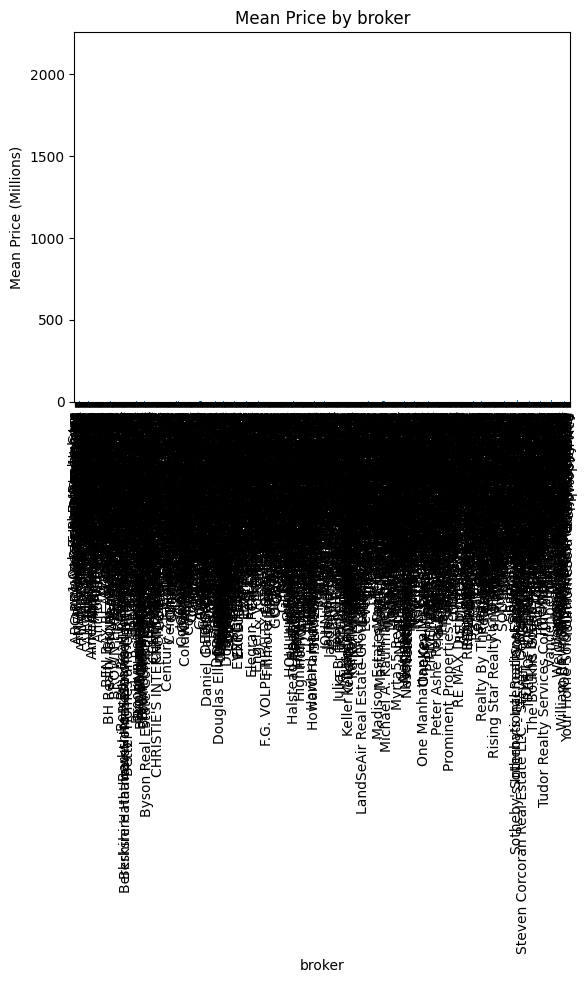

In [6]:
#this code should be reproduced at part 3: clustering

data['BROKERTITLE'] = data['BROKERTITLE'].apply(lambda title: title.replace('Brokered by ', ''))
mean_prices = data.groupby(['BROKERTITLE'])['PRICE'].mean() / 1000000

# Plotting
mean_prices.plot(kind='bar')
plt.title('Mean Price by broker')
plt.xlabel('broker')
plt.ylabel('Mean Price (Millions)')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if necessary
plt.show()

## HANDLE INVALID VALUES

### Handle typo

In [7]:
data.loc[(data['BATH'] > 2) & (data['BATH'] < 3), 'BATH'] = 2

In [8]:
data.loc[data['TYPE'] == 'Condop for sale', 'TYPE'] = 'Condo for sale'

### Handle meaningless sublocality

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['PRICE_standardized'] = scaler.fit_transform(data[['PRICE']])
sorted_data = data.sort_values(by='PRICE_standardized', ascending=False)
sorted_data = sorted_data[2:]
#data = data.drop('BROKERTITLE', axis=1)

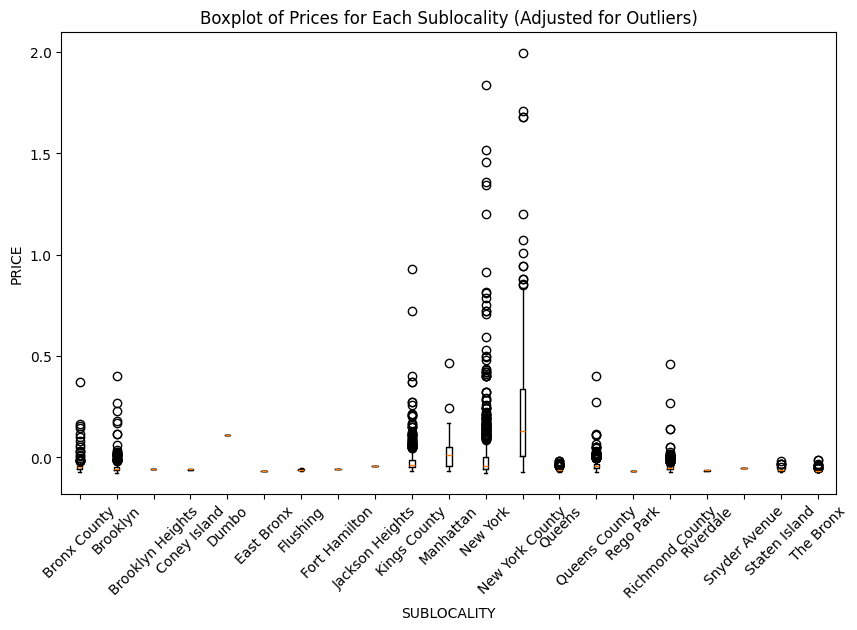

In [10]:
import matplotlib.pyplot as plt

grouped = sorted_data.groupby('SUBLOCALITY')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create a list for x-tick labels
xticklabels = []
positions = []

for i, (name, group) in enumerate(grouped):
    # Adjust the 'whis' parameter here, e.g., 1.0, 1.5, etc.
    ax.boxplot(group['PRICE_standardized'], positions=[i], whis=1.5)

    xticklabels.append(name)
    positions.append(i)

# Set x-axis label
ax.set_xlabel('SUBLOCALITY')

# Set y-axis label
ax.set_ylabel('PRICE')

# Set x-tick labels
ax.set_xticks(positions)
ax.set_xticklabels(xticklabels, rotation=45)  # Rotate for better readability if needed

# Set title
ax.set_title('Boxplot of Prices for Each Sublocality (Adjusted for Outliers)')

# Show plot
plt.show()

In [11]:
# Define the replacement dictionary
replacement_dict = {
    'Bronx County': 'The Bronx',
    'East Bronx': 'The Bronx',
    'Riverdale': 'The Bronx',
    'Kings County': 'Brooklyn',
    'Coney Island': 'Brooklyn',
    'Brooklyn Heights': 'Brooklyn',
    'Snyder Avenue': 'Brooklyn',
    'Fort Hamilton': 'Brooklyn',
    'Dumbo': 'Brooklyn',
    'New York County': 'Manhattan',
    'New York': 'Manhattan',
    'Richmond County': 'Staten Island',
    'Queens County': 'Queens',
    'Jackson Heights': 'Queens',
    'Flushing': 'Queens',
    'Rego Park': 'Queens'
}

# Replace values in 'SUBLOCALITY' column
data['SUBLOCALITY'].replace(replacement_dict, inplace=True)

/var/folders/0y/xnx3sz6927z6fg600l0yk8p40000gn/T/ipykernel_31717/2748307798.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SUBLOCALITY'].replace(replacement_dict, inplace=True)


'The Bronx': 'Bronx County' , 'East Bronx' , 'Riverdale' , 
'Brooklyn': 'Kings County' , 'Coney Island' , 'Brooklyn Heights' , 'Snyder Avenue' , 'Fort Hamilton' ,  'Dumbo' 
'Manhattan': 'New York County' ,  'New York'
'Staten Island': 'Richmond County'
'Queens': 'Queens County' , 'Jackson Heights' , 'Flushing' , 'Rego Park'  


/var/folders/0y/xnx3sz6927z6fg600l0yk8p40000gn/T/ipykernel_31717/3619793971.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=average_prices.index, y=average_prices.values, palette="viridis")


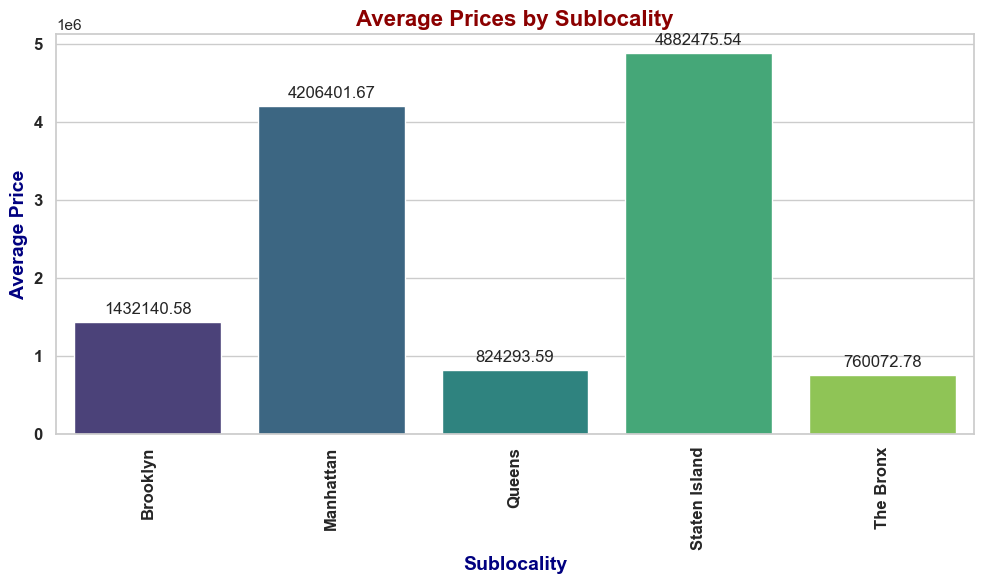

In [12]:
import seaborn as sns

average_prices = data.groupby('SUBLOCALITY')['PRICE'].mean()

# Using seaborn's style
sns.set(style="whitegrid")

# Plotting the average prices
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=average_prices.index, y=average_prices.values, palette="viridis")

# Adding labels and title with more customization
plt.xlabel('Sublocality', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('Average Price', fontsize=14, fontweight='bold', color='navy')
plt.title('Average Prices by Sublocality', fontsize=16, fontweight='bold', color='darkred')

# Customizing ticks for readability
plt.xticks(fontsize=12, fontweight='bold', rotation=90)
plt.yticks(fontsize=12, fontweight='bold')

# Adding value labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

### HANDLE MEANINGLESS TYPE

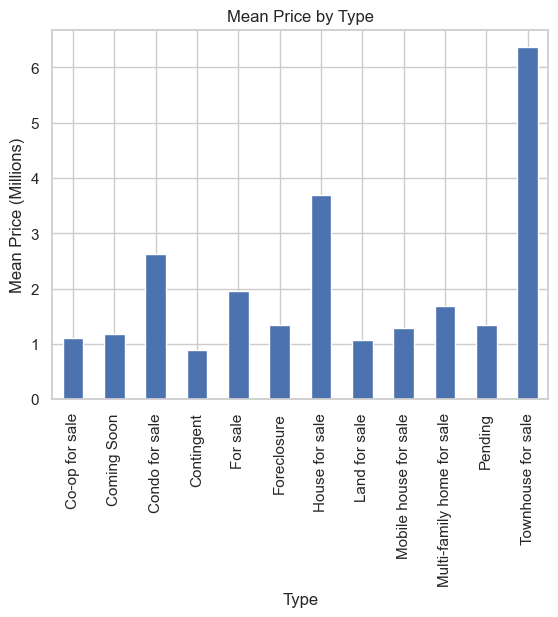

In [13]:
import matplotlib.pyplot as plt

# Assuming data is your DataFrame
# data.groupby(['TYPE'])['PRICE'].mean() / 1000000 will give you the mean price for each type, divided by 1,000,000
mean_prices = data.groupby(['TYPE'])['PRICE'].mean() / 1000000

# Plotting
mean_prices.plot(kind='bar')
plt.title('Mean Price by Type')
plt.xlabel('Type')
plt.ylabel('Mean Price (Millions)')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if necessary
plt.show()

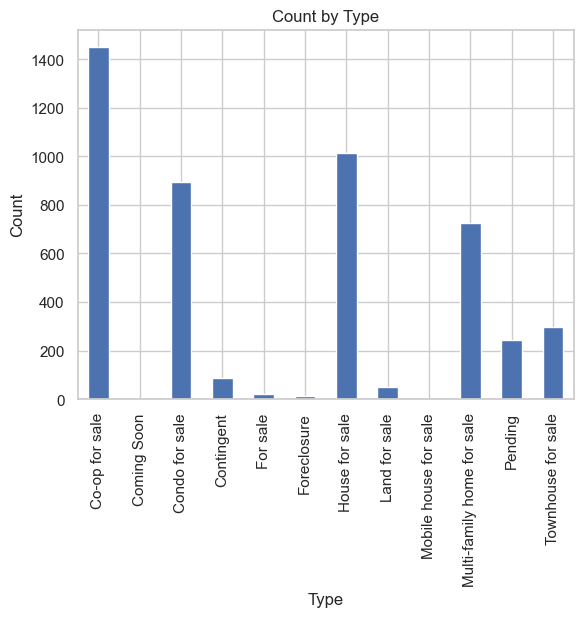

In [14]:
size_by_type = data.groupby(['TYPE']).size()

# Plotting
size_by_type.plot(kind='bar')
plt.title('Count by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if necessary
plt.show()

In [15]:
data.groupby('TYPE').size()

TYPE
Co-op for sale                1450
Coming Soon                      2
Condo for sale                 896
Contingent                      88
For sale                        20
Foreclosure                     14
House for sale                1012
Land for sale                   49
Mobile house for sale            1
Multi-family home for sale     727
Pending                        243
Townhouse for sale             299
dtype: int64

In [16]:
data.loc[data['TYPE'].isin(['Foreclosure', 'Contingent', 'Coming Soon', 'Pending', 'For sale']), 'TYPE'] = "unspecified"
data.groupby('TYPE').size()

TYPE
Co-op for sale                1450
Condo for sale                 896
House for sale                1012
Land for sale                   49
Mobile house for sale            1
Multi-family home for sale     727
Townhouse for sale             299
unspecified                    367
dtype: int64

In [17]:
data.shape[0]

4801

### RESOLVE 'UNKNOWN' HOUSING TYPE

In [18]:
# percentage of the dataset with invalid type
data[data['TYPE'] == 'unspecified'].shape[0] / data.shape[0]

0.07644240783170173

#### Using LabelEncoder()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['SUBLOCALITY_label_encoded'] = label_encoder.fit_transform(data['SUBLOCALITY'])

known_type_data = data[data['TYPE'] != 'unspecified']
unspecified_type_data = data[data['TYPE'] == 'unspecified']
known_type_data.groupby('TYPE').size()

TYPE
Co-op for sale                1450
Condo for sale                 896
House for sale                1012
Land for sale                   49
Mobile house for sale            1
Multi-family home for sale     727
Townhouse for sale             299
dtype: int64

In [20]:
X = known_type_data[['SUBLOCALITY_label_encoded', 'PROPERTYSQFT', 'PRICE', 'BEDS', 'BATH']]
Y = known_type_data['TYPE']

In [21]:
Y.value_counts()

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 896
Multi-family home for sale     727
Townhouse for sale             299
Land for sale                   49
Mobile house for sale            1
Name: count, dtype: int64

In [22]:
X.head()

,SUBLOCALITY_label_encoded,PROPERTYSQFT,PRICE,BEDS,BATH
0,1,1400.0,315000,2,2.0
1,1,17545.0,195000000,7,10.0
2,3,2015.0,260000,4,2.0
3,1,445.0,69000,3,1.0
4,1,14175.0,55000000,7,2.0


Accuracy: 0.6865839909808342


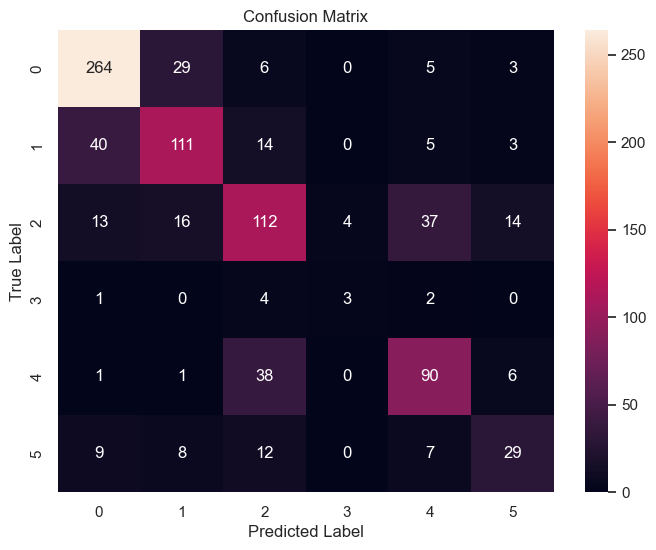

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### TODO: HERE, COMMENT ABOUT THE TYPE PREDICTION BASED ON 'SUBLOCALITY_label_encoded', 'PROPERTYSQFT', 'PRICE', 'BEDS', 'BATH'

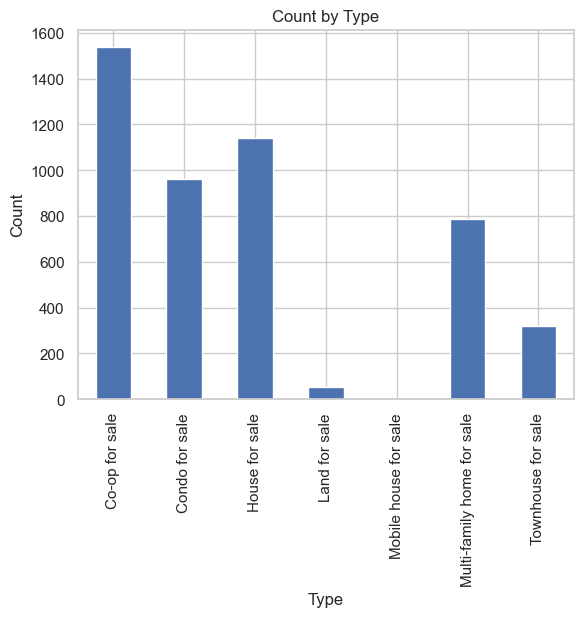

In [24]:
data.loc[data['TYPE'] == 'unspecified', 'TYPE'] = clf.predict(unspecified_type_data[['SUBLOCALITY_label_encoded', 'PROPERTYSQFT', 'PRICE', 'BEDS', 'BATH']])

size_by_type = data.groupby(['TYPE']).size()

# Plotting
size_by_type.plot(kind='bar')
plt.title('Count by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if necessary
plt.show()

### HANDLE OUTLIERS

In [25]:
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns

Index(['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE',
       'PRICE_standardized', 'SUBLOCALITY_label_encoded'],
      dtype='object')

In [26]:
Q1_numeric = data[numeric_columns].quantile(0.25)
Q3_numeric = data[numeric_columns].quantile(0.75)
IQR_numeric = Q3_numeric - Q1_numeric
#original threshold
#outlier_cutoff_numeric = 10 * IQR_numeric
#edited threshold
outlier_cutoff_numeric = 6 * IQR_numeric

house_data_filtered = data[~((data[numeric_columns] < (Q1_numeric - outlier_cutoff_numeric)) | 
                             (data[numeric_columns] > (Q3_numeric + outlier_cutoff_numeric))).any(axis=1)]

data = house_data_filtered

### Processing zip code

In [27]:
data['ADMINISTRATIVE_AREA_LEVEL_2'].unique()

array(['New York County', 'United States', 'New York', 'Bronx County',
       '11214', '10301', '10309', '10303', '11234', '11414', '10310',
       '10003', '11417', '10304', 'Kings County', '10463',
       'Queens County', '10017', '10306', '10471', '11229', '10312',
       '11412', '10465', 'Brooklyn', '10002', '10466', '11237', '11218'],
      dtype=object)

In [28]:
import re

def extract_zip(address):
    zip_code = re.findall(r"\b\d{5}\b", address)
    if zip_code:
        return int(zip_code[0])
    else:
        return None

data['zip_code'] = data['FORMATTED_ADDRESS'].apply(extract_zip)

# Display the 'zip_code' column
print(data['zip_code'])

0       10022.0
2       10312.0
3       10022.0
5       11238.0
6       10027.0
         ...   
4796    10075.0
4797    11374.0
4798    10011.0
4799    11373.0
4800    11224.0
Name: zip_code, Length: 4549, dtype: float64


In [29]:
# with the zip code fill above, there is one entry with null zip code at Jackson heights
data['zip_code'].fillna(11372, inplace=True)

/var/folders/0y/xnx3sz6927z6fg600l0yk8p40000gn/T/ipykernel_31717/1281834424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['zip_code'].fillna(11372, inplace=True)


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4549 entries, 0 to 4800
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4549 non-null   object 
 1   TYPE                         4549 non-null   object 
 2   PRICE                        4549 non-null   int64  
 3   BEDS                         4549 non-null   int64  
 4   BATH                         4549 non-null   float64
 5   PROPERTYSQFT                 4549 non-null   float64
 6   ADDRESS                      4549 non-null   object 
 7   STATE                        4549 non-null   object 
 8   MAIN_ADDRESS                 4549 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4549 non-null   object 
 10  LOCALITY                     4549 non-null   object 
 11  SUBLOCALITY                  4549 non-null   object 
 12  STREET_NAME                  4549 non-null   object 
 13  LONG_NAME              

### Is close to attraction

In [31]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0 #kilometer

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [32]:
# attractions in Manhattan: 'Times Square','Central Park', 'World Trade Center', 'Wall Street'
lat2, lon2 = 40.758896, -73.98513
data['Times Square'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)

lat2, lon2 = 40.7825, -73.9661 
data['Central Park'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)

lat2, lon2 = 40.7127, -74.013382
data['World Trade Center'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)

lat2, lon2 = 40.706005, -74.008827
data['Wall Street'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)


# attractions in Brooklyn: 'Stairs to Brooklyn Bridge', 'Brooklyn Botanic Garden'

lat2, lon2 = 40.7007, -73.9898
data['Stairs to Brooklyn Bridge'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)

lat2, lon2 = 40.6677, -73.9636
data['Brooklyn Botanic Garden'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)


# attractions in Queens: 'Flushing Meadows Corona Park', 'Queens Zoo'

lat2, lon2 = 40.7400, -73.8407
data['Flushing Meadows Corona Park'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)

lat2, lon2 = 40.7437, -73.8486
data['Queens Zoo'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)

# attractions in Bronx: 'Bronx Zoo', 'Yankee Stadium'

lat2, lon2 = 40.829659, -73.926186
data['Yankee Stadium'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)

lat2, lon2 = 40.850278, -73.878333
data['Bronx Zoo'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)

# attractions in staten island

lat2, lon2 = 40.6425, -74.1028
data['Sailors Snug Harbor'] = data.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], lat2, lon2), axis=1)

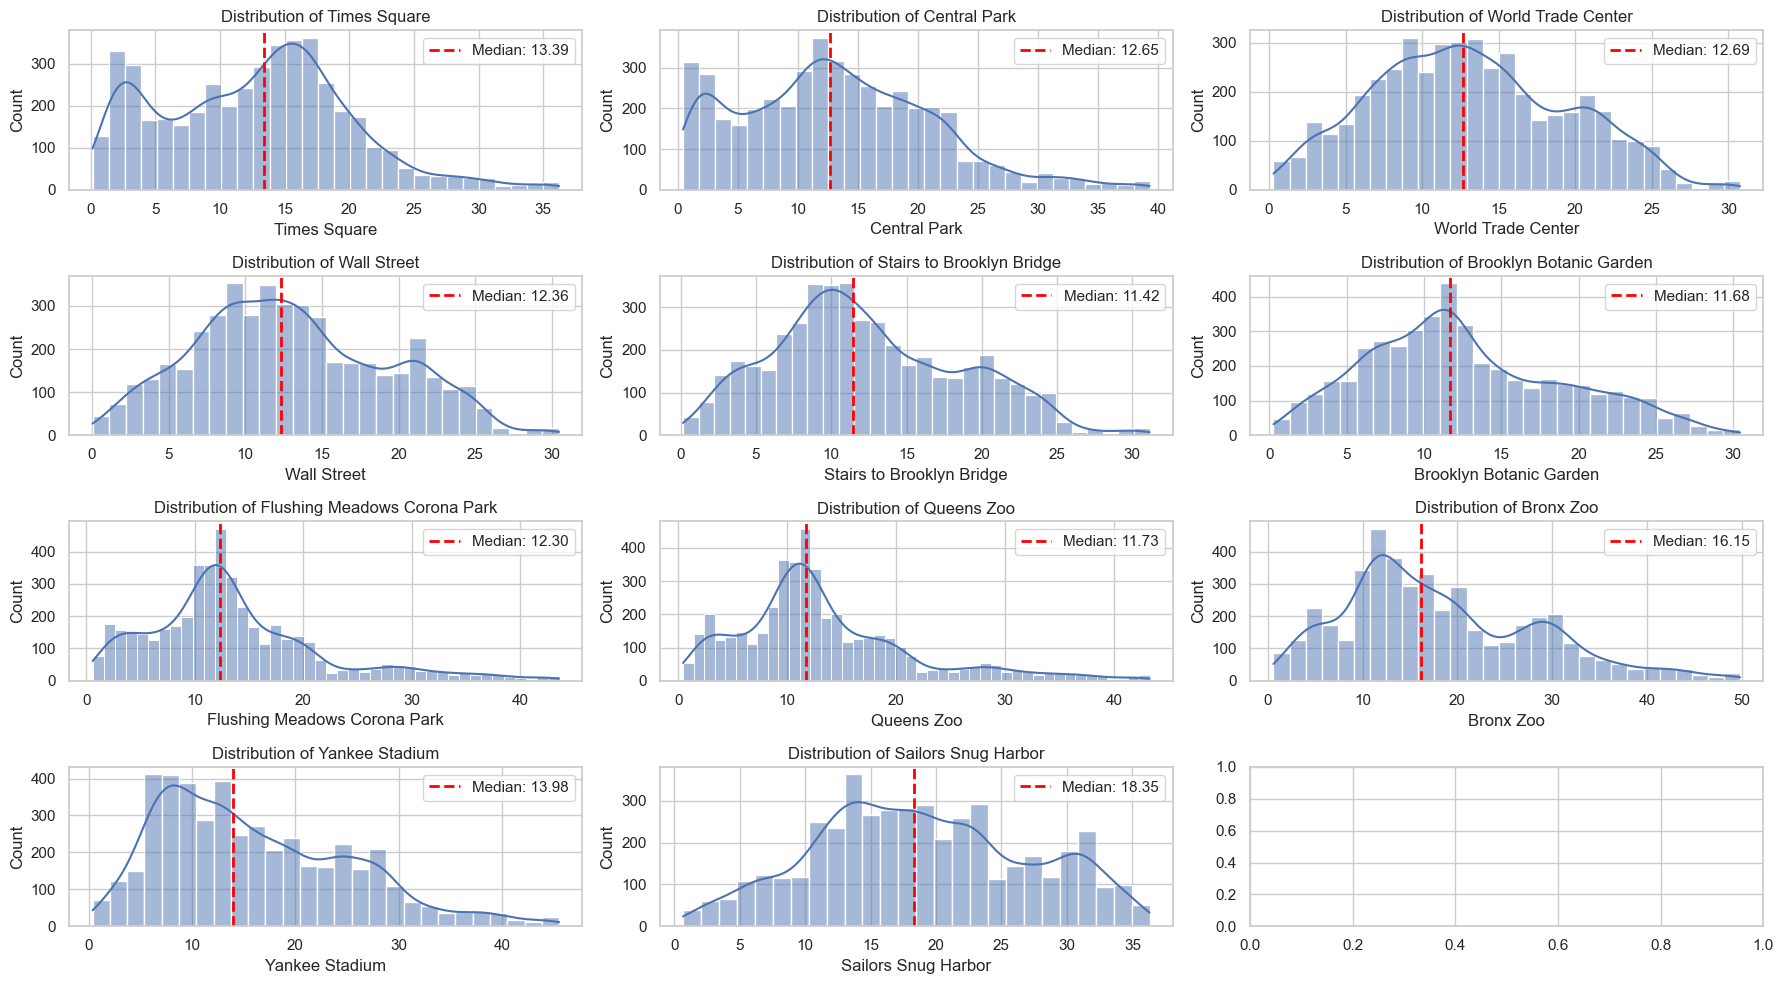

In [33]:
selected_columns = ['Times Square','Central Park', 'World Trade Center', 'Wall Street',
                    'Stairs to Brooklyn Bridge', 'Brooklyn Botanic Garden',
                    'Flushing Meadows Corona Park', 'Queens Zoo',
                    'Bronx Zoo', 'Yankee Stadium',
                    'Sailors Snug Harbor']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 10)) 

for col, ax in zip(selected_columns, axes.flatten()[:-1]):
    sns.histplot(data[col], kde=True, ax=ax)
    
    median_value = data[col].median()
    ax.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

    ax.set_title(f'Distribution of {col}')
    ax.legend()

plt.tight_layout()

plt.show()

In [34]:
location_map = {
    0:'Times Square',
    1:'Central Park', 
    2:'World Trade Center', 
    3:'Wall Street',
    4:'Stairs to Brooklyn Bridge', 
    5:'Brooklyn Botanic Garden',      
    6:'Flushing Meadows Corona Park', 
    7:'Queens Zoo',      
    8:'Bronx Zoo', 
    9:'Yankee Stadium',
    10:'Sailors Snug Harbor'
}

for index, row in data.iterrows():
    value = 0
    # Access row values using row['column_name']
    for i in range (5):
        if(row[location_map[i]] <= 2.41402): #25 minutes walk
            value += 1
    data.at[index, 'is close to central areas'] = int(value)

data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,World Trade Center,Wall Street,Stairs to Brooklyn Bridge,Brooklyn Botanic Garden,Flushing Meadows Corona Park,Queens Zoo,Yankee Stadium,Bronx Zoo,Sailors Snug Harbor,is close to central areas
0,Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,...,6.315934,6.790912,6.855978,10.443204,11.514622,10.781869,8.624590,12.785909,17.069721,1.0
2,Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,...,24.472446,24.149335,24.806522,24.109149,37.214871,36.927890,39.274645,43.522938,13.690922,0.0
3,COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,...,6.323883,6.800660,6.869545,10.459994,11.528548,10.795463,8.615727,12.780508,17.075104,1.0
5,Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,...,6.277453,5.497606,3.929556,0.847353,12.338573,12.066661,17.484278,20.699493,12.659132,0.0
6,Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,...,12.132633,12.634008,12.623563,15.825259,11.807615,11.035828,2.837770,7.333078,22.748090,0.0


In [35]:
data = data.drop(columns = selected_columns)

# TRAINING

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

encoder = LabelEncoder() 
data['encoded_sublocality'] = encoder.fit_transform(data[['SUBLOCALITY']])
data['encoded_type'] = encoder.fit_transform(data[['TYPE']])

# Concatenating the encoded features with other features
X = data[['encoded_type', 'BEDS', 'BATH', 'PROPERTYSQFT', 'encoded_sublocality', 'zip_code', 'is close to central areas']]
Y = data['PRICE_standardized']
#X = data.drop(['PRICE'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### RandomForestRegressor

In [37]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.00960620349300931
Mean Absolute Percentage Error: 0.9604473019091062
R² Score: 0.7716238105936997


### Feature Importance

                     Feature  Importance
2                       BATH    0.260459
3               PROPERTYSQFT    0.228332
5                   zip_code    0.199576
6  is close to central areas    0.191081
0               encoded_type    0.051925
1                       BEDS    0.045078
4        encoded_sublocality    0.023549


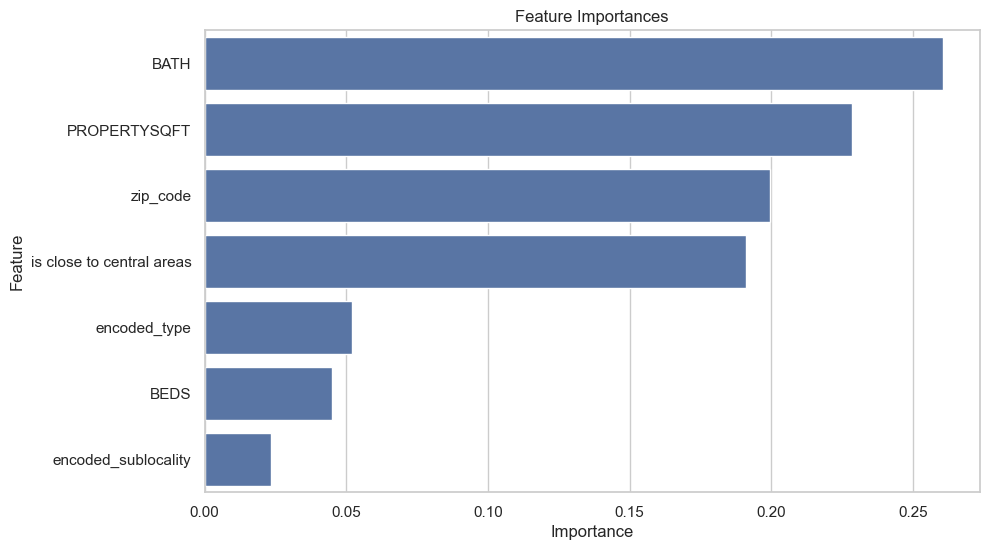

In [38]:
feature_importances = model.feature_importances_

# Creating a DataFrame to display feature importances
features = X.columns
importances_data = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the DataFrame by importance for better visualization
importances_data = importances_data.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(importances_data)

# Optional: Plotting the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_data)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Absolute Error (Gradient Boosting): {mae_gb}")
print(f"Mean Absolute Percentage Error (Gradient Boosting): {mape_gb}")
print(f"R² Score (Gradient Boosting): {r2_gb}")


Mean Absolute Error (Gradient Boosting): 0.01043560297776694
Mean Absolute Percentage Error (Gradient Boosting): 1.3414833432713382
R² Score (Gradient Boosting): 0.7700275939394778


# EVALUATION (after score)

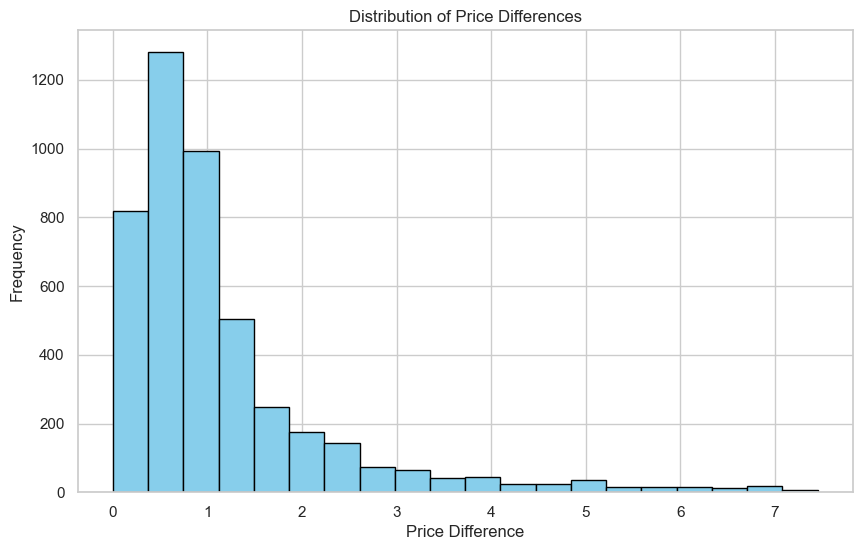

In [40]:
#model is RandomForest
#X = data[['encoded_type', 'BEDS', 'BATH', 'PROPERTYSQFT', 'encoded_sublocality', 'zip_code']]
data['price_from_rf'] = model.predict(X)
data['price_diff'] = (data['PRICE'] - data['price_from_rf']) / 1000000

plt.figure(figsize=(10, 6))
plt.hist(data['price_diff'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Price Differences')
plt.grid(True)
plt.show()

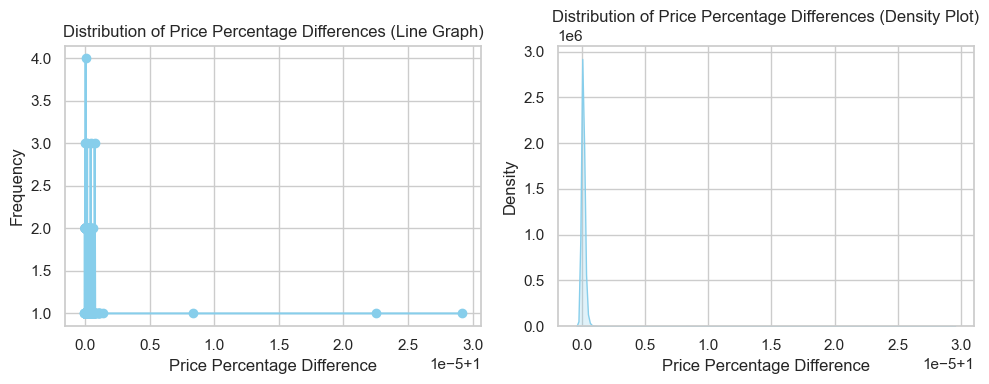

In [41]:
data['price_diff_pct'] = (data['PRICE'] - data['price_from_rf']) / data['PRICE']

value_counts = data['price_diff_pct'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Line graph
ax1.plot(value_counts.index, value_counts.values, color='skyblue', marker='o', linestyle='-')
ax1.set_xlabel('Price Percentage Difference')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Price Percentage Differences (Line Graph)')
ax1.grid(True)
# Density plot
sns.kdeplot(data['price_diff_pct'], color='skyblue', fill=True, ax=ax2)
ax2.set_xlabel('Price Percentage Difference')
ax2.set_ylabel('Density')
ax2.set_title('Distribution of Price Percentage Differences (Density Plot)')


plt.tight_layout()
plt.show()

# KMeans clustering

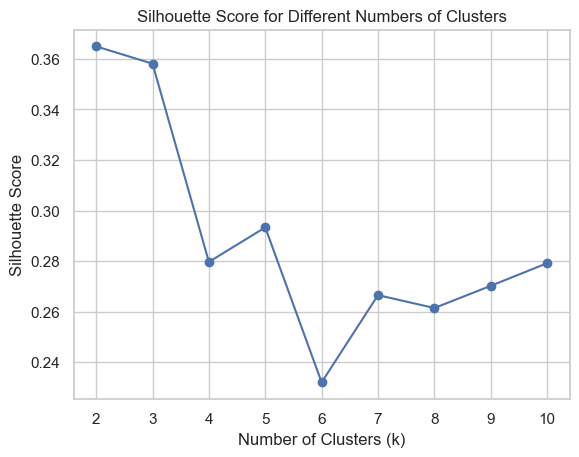

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

#X = data[['encoded_type', 'BEDS', 'BATH', 'PROPERTYSQFT', 'encoded_sublocality', 'zip_code', 'PRICE']]
X = data[['BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE', 'zip_code', 'encoded_type', 'is close to central areas']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = range(2, 11)  # Try values from 2 to 10 clusters
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

In [50]:
#BEST VALUE FOR CLUSTER IS K = 5
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_
data['cluster'] = cluster_labels

cluster_centroids = kmeans.cluster_centers_
cluster_centroids

array([[-5.62351444e-01, -6.01516820e-01, -5.22302336e-01,
        -5.05016969e-01, -1.19169132e-02, -6.17171661e-01,
        -2.43932774e-01],
       [ 2.02967621e+00,  2.13240626e+00,  1.88448186e+00,
         1.20700974e+00, -1.03596797e-03,  1.47701046e+00,
        -2.22412001e-01],
       [-3.53606408e-01,  2.80658200e-02, -2.86535462e-03,
         1.14980926e+00, -5.75898439e-01, -6.19039974e-01,
         2.06761856e+00],
       [ 4.85738572e-01,  3.40231871e-01,  3.00322005e-01,
        -3.48450075e-02,  7.30712930e-02,  8.61880138e-01,
        -4.46738261e-01],
       [-7.24305060e-01, -2.16852163e-01, -3.31969042e-01,
        -5.72231720e-01,  1.13298465e+01, -9.25572649e-01,
        -4.54959751e-01]])

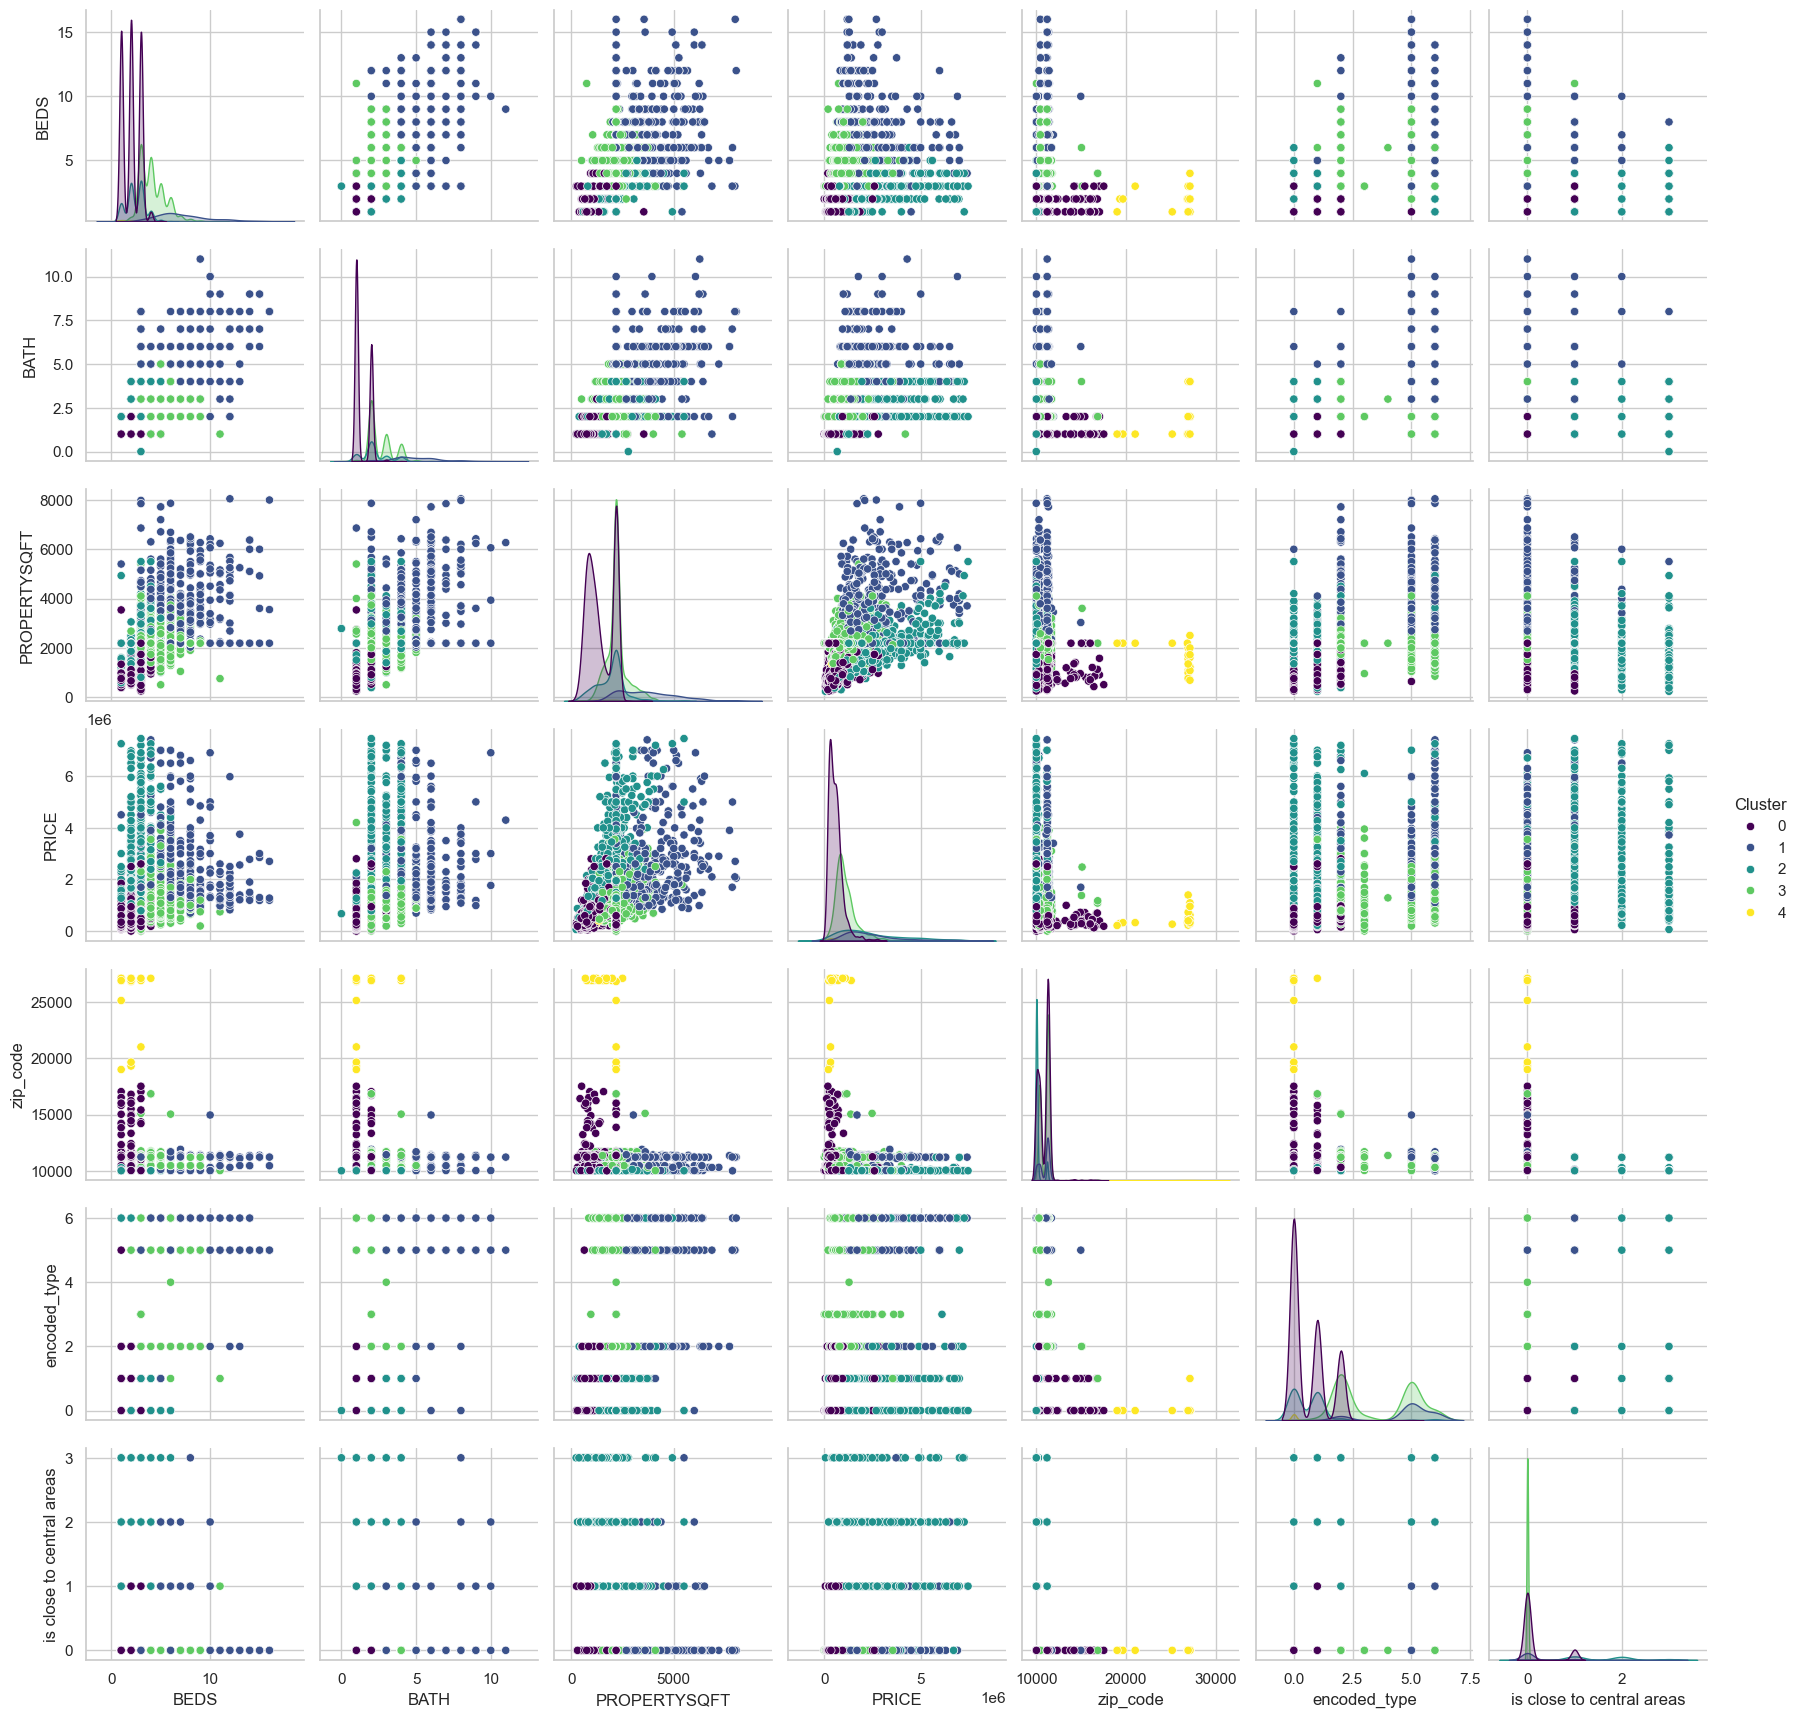

In [51]:
selected_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE', 'zip_code', 'encoded_type', 'is close to central areas']
pair_data = data[selected_features].copy()
pair_data['Cluster'] = cluster_labels

# Create the pair plot
sns.pairplot(pair_data, hue='Cluster', palette='viridis')
plt.show()

In [52]:
silhouette = silhouette_score(X_scaled, cluster_labels)

# Calculate Davies–Bouldin index
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

print("Silhouette Score:", silhouette)
print("Davies–Bouldin Index:", davies_bouldin)

# Add measurements to a dictionary or DataFrame
measurements = {
    'Silhouette Score': silhouette,
    'Davies–Bouldin Index': davies_bouldin
}

Silhouette Score: 0.29331535666095976
Davies–Bouldin Index: 1.0379681608900078


### CLUSTERING RESULT

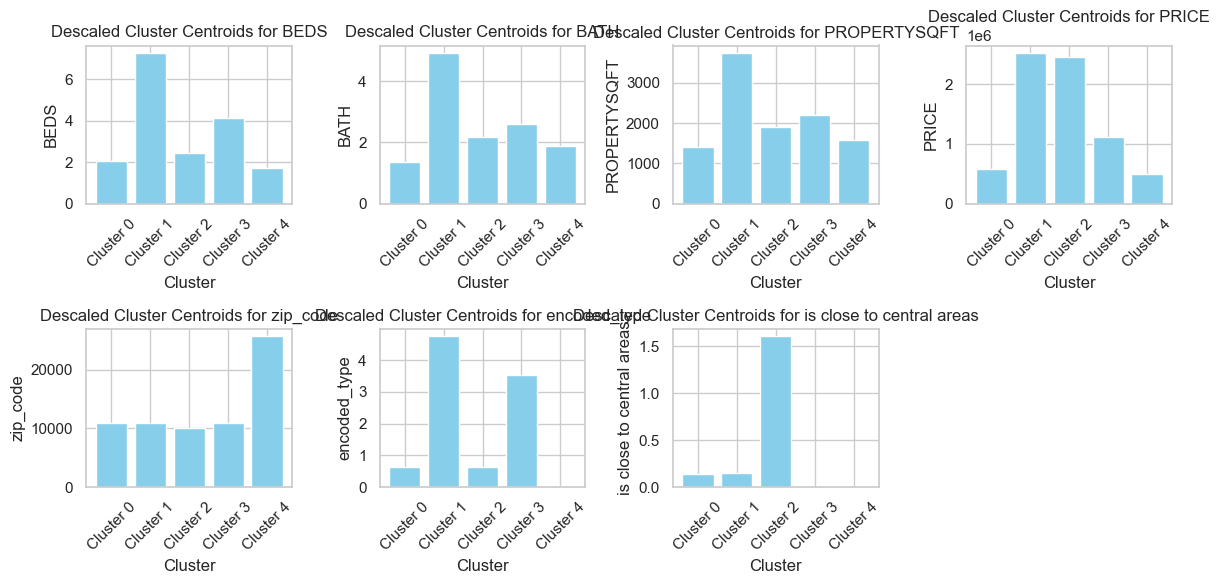

In [53]:
cluster_centroids_descaled = scaler.inverse_transform(cluster_centroids)

feature_names = ['BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE', 'zip_code', 'encoded_type', 'is close to central areas']
cluster_centroids_df = pd.DataFrame(cluster_centroids_descaled, columns=feature_names)
#feature_names = ['encoded_type', 'BEDS', 'BATH', 'PROPERTYSQFT', 'encoded_sublocality', 'zip_code', 'PRICE']

# Create a bar plot for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 4, i+1)
    plt.bar(range(k), cluster_centroids_df[feature], color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'Descaled Cluster Centroids for {feature}')
    plt.xticks(range(k), [f'Cluster {j}' for j in range(k)], rotation=45)
plt.tight_layout()
plt.show()

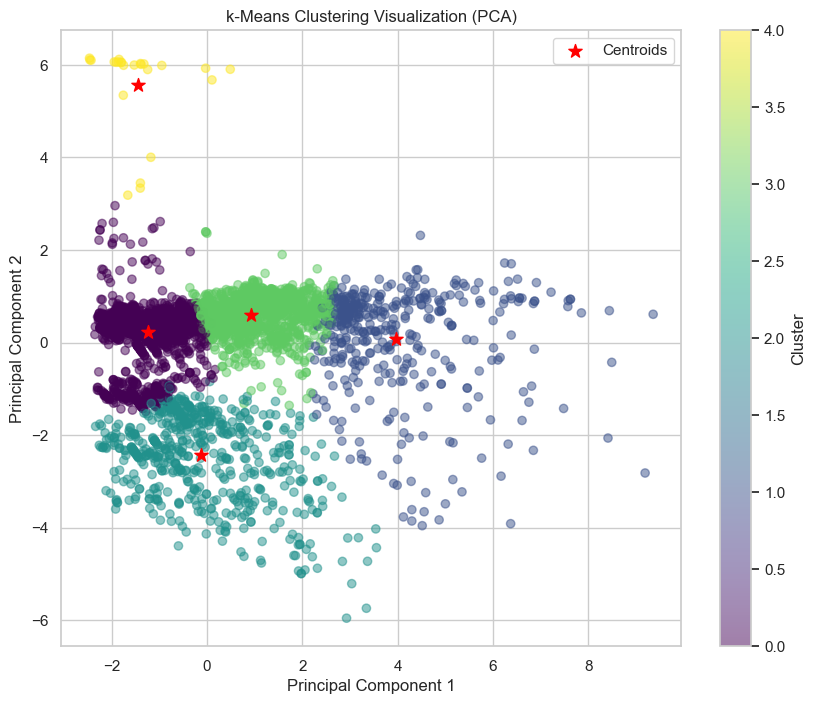

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=100, c='red', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-Means Clustering Visualization (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
components = pca.components_
components

array([[ 0.49121742,  0.50244339,  0.44646935,  0.33484358, -0.02342634,
         0.43837801, -0.04557316],
       [ 0.15102624,  0.00138656, -0.08037002, -0.47146101,  0.46489667,
         0.2237984 , -0.6944348 ]])

In [56]:
data.groupby('cluster').size()

cluster
0    2192
1     398
2     596
3    1339
4      24
dtype: int64